# Classical mechanics numerical project 2

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.linalg import solve

In [210]:
t, g, l1, l2, l3, l4, m1, m2 = smp.symbols("t g l_1 l_2 l_3 l_4 m_1 m_2", positive = True)
theta, psi = smp.symbols(r'\theta \psi', cls = smp.Function)
theta, psi = theta(t), psi(t)
theta_d, psi_d = smp.diff(theta,t), smp.diff(psi,t)

Defining the kinetic and potential energies of the two weights

In [211]:
T1 = 1/2 * m1 * l1**2 * theta_d**2
T2 = 1/2 * m2 * (l2 - l4*smp.cos(psi))**2 * theta_d**2 + m2 * l4**2 * psi_d**2
V1 = (l3 - l1*smp.cos(theta))*m1*g
V2 = (l3 + l2*smp.cos(theta)) - l4*(smp.sin(theta - 0.5*smp.pi + (0.5*smp.pi - psi)))*m2*g
L1 = T1 - V1
L2 = T2 - V2

In [212]:
LE1 = smp.diff(L1,theta) - smp.diff(smp.diff(L1,theta_d),t)
LE2 = smp.diff(L2,psi) - smp.diff(smp.diff(L2,psi_d),t)

In [213]:
LE1.simplify()

-1.0*l_1*m_1*(g*sin(\theta(t)) + l_1*Derivative(\theta(t), (t, 2)))

In [214]:
LE2.simplify()

l_4*m_2*(-g*cos(\psi(t) - \theta(t)) - 2*l_4*Derivative(\psi(t), (t, 2)) + 1.0*(l_2 - l_4*cos(\psi(t)))*sin(\psi(t))*Derivative(\theta(t), t)**2)

##### Parameters

In [215]:
m1 = 2000# m1 mass of the counterweight 2000 kg
m2 = 15# m2 mass of the projectile 15 kg
l1 = 1.2# l1 short part of the main beam 1.2 m
l2 = 5.7# l2 long part of the main beam, 5.7 m
l3 = 3.2# l3 stand 3.2 m
l4 = 5# l4 projectile sling 5 m
g = 9.81# g gravitation constant 9.81 m/s
# 2
theta0 = 0.7*np.pi# at t = 0, 0.7π rad
theta_d0 = 0# at t = 0, 0rad/s
psi0 = theta0 - 0.5*np.pi# at t = 0, theta0 - 0.5pi
psi_d0 = 0# at t = 0, 0rad/s

##### RungaKutta 4

In [216]:
def RK4(f,x0, t_end, h = 0.1):#,tol = 1E-7, maxiter = 100):
    df = len(x0)
    N = int(t_end/h)
    ts = np.linspace(0,t_end,N)
    xs = np.zeros((N,df))
    xs[0] = x0
    for count, t in enumerate(ts):
        if count == 0:
            continue
        k1 = f(t,xs[count-1])
        k2 = f(t+h/2,xs[count-1]+h*k1/2)
        k3 = f(t+h/2,xs[count-1]+h*k2/2)
        k4 = f(t+h,xs[count-1]+h*k3)
        xs[count] = xs[count-1] + h/6* (k1 +2*k2 + 2*k3 + k4)
    return xs,ts

In [217]:
def EOM(t, x):
    theta, theta_d, psi, psi_d = x[:]
    
    a11 = -l1**2*m1 - l2**2*m2 + 2*l2*l4*m2*np.cos(psi) - l4**2*m2
    a12 = -l4*m2*(l2*np.cos(psi) - l4)
    a21 = a12
    a22 = -l4**2*m2
    A = np.array([[a11,a12],
                  [a21,a22]])
    b1 = g*m1*l1*np.sin(theta) - g*m2*(l2*np.sin(theta) + l4*np.sin(psi - theta)) - l2*l4*m2*(psi_d - 2*theta_d)*np.sin(psi)*psi_d
    b2 = l4*m2*(g*np.sin(psi - theta) - l2*np.sin(psi)*theta_d**2)
    b = np.array([b1, b2])
    
    qdd = solve(A,b)
    
    return np.array([theta_d, qdd[0], psi_d, qdd[1]])

##### Problem 1.2)

In [218]:
t_end = 100
h = 0.01
x0 = np.array([theta0, theta_d0, psi0, psi_d0])

In [219]:
sol1,ts1 = RK4(EOM,x0,t_end,h)

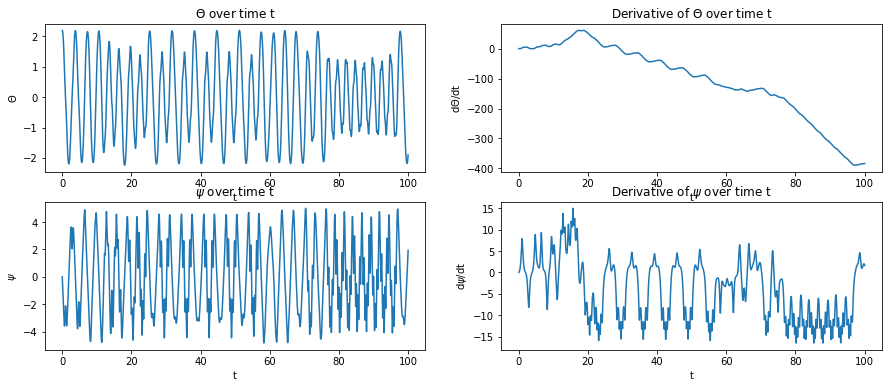

In [220]:
fig, axs = plt.subplots(2,2, figsize = (15,6))
titles = np.array([[["$\Theta$ over time t", "$\Theta$"], ["Derivative of $\Theta$ over time t", "d$\Theta$/dt"]], 
         [["$\psi$ over time t", "$\psi$"], ["Derivative of $\psi$ over time t", "d$\psi$/dt"]]])
for j in range(2):
    for i in range(2):
        axs[i, j].set_title(str(titles[i, j, 0]))
        axs[i, j].set_xlabel("t")
        axs[i, j].set_ylabel(str(titles[i, j, 1]))
        axs[i, j].plot(ts1, sol1[:, i + j*2])

In [221]:
def fromPolarToCartesian(theta_psi, array = False):
    if not array:
        x = -l2*np.sin(theta_psi[0]) + l4*np.sin(theta_psi[2] - theta_psi[0])
        y = l3 - l2*np.cos(theta_psi[0]) + l4*np.cos(theta_psi[2] - theta_psi[0])
        dx = -l2*np.cos(theta_psi[0])*theta_psi[1] + l4*np.cos(theta_psi[2] - theta_psi[0])*(theta_psi[3] - theta_psi[1])
        dy = l2*np.sin(theta_psi[0])*theta_psi[1] - l4*np.sin(theta_psi[2] - theta_psi[0])*(theta_psi[3] - theta_psi[1])
    else:
        x = -l2*np.sin(theta_psi[:,0]) + l4*np.sin(theta_psi[:,2] - theta_psi[:,0])
        y = l3 - l2*np.cos(theta_psi[:,0]) + l4*np.cos(theta_psi[:,2] - theta_psi[:,0])
        dx = -l2*np.cos(theta_psi[:,0])*theta_psi[:,1] + l4*np.cos(theta_psi[:,2] - theta_psi[:,0])*(theta_psi[:,3] - theta_psi[:,1])
        dy = l2*np.sin(theta_psi[:,0])*theta_psi[:,1] - l4*np.sin(theta_psi[:,2] - theta_psi[:,0])*(theta_psi[:,3] - theta_psi[:,1])
    return np.array([x, dx, y, dy])

In [222]:
def plot_xy(theta_psi, ts):
    xs, dxs, ys, dys = fromPolarToCartesian(theta_psi, array = True)
    plt.title("Trajectory of trebuchet projectile")
    plt.xlabel("length")
    plt.ylabel("height")
    plt.plot(xs, ys, label = "numerical", lw = 1)
    plt.legend()

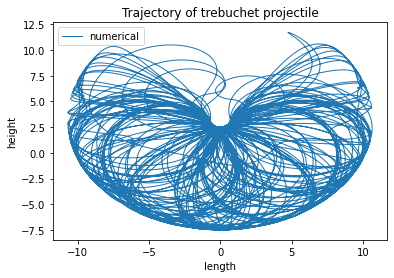

In [223]:
plot_xy(sol1, ts1)

###### Problem 1.3)

Equations of motion of a projectile in motion without friction is given the function under.

In [224]:
def projectileDE_noFric(t,x):
    return np.array([x[1],0,x[3],-g])

In [225]:
for count, theta in enumerate(sol1[:,0]):
    if theta < 0.1*np.pi:
        r_count = count
        break
sol_r = sol1[r_count,:]

sol2,ts2= RK4(projectileDE_noFric,fromPolarToCartesian(sol_r),t_end,h)        

In [226]:
print(r_count)
print(np.shape(sol1[:r_count,:]))
print(np.shape(sol2))
full_sol = np.concatenate((sol1[:r_count], sol2))
full_ts = np.concatenate((ts1[:r_count], ts2 + ts1[r_count]))

82
(82, 4)
(10000, 4)


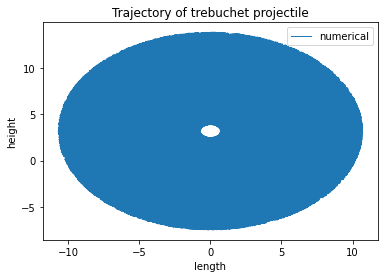

In [227]:
plot_xy(full_sol, full_ts)